In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt


# Creation of variables

### Sex
1 represents male; 0 represents female

In [2]:
# Define el tamaño del conjunto de datos
dataset_size = 10000

# Define el porcentaje real de hombres en la población
porcentaje_hombres_real = 0.505  # Por ejemplo, el 50.5% son hombres

# Calcula el número de hombres en el conjunto de datos sintético
num_hombres = int(dataset_size * porcentaje_hombres_real)

# Crea una columna "sexo" con la proporción correcta
hombres = np.ones(num_hombres)  # 1 representa "hombre"
mujeres = np.zeros(dataset_size - num_hombres)  # 0 representa "mujer"

# Combina las dos listas para obtener la columna completa de "sexo"
columna_sexo = np.concatenate([hombres, mujeres])

# Mezcla los valores para que no estén en orden
np.random.shuffle(columna_sexo)

# Crea un DataFrame con la columna "sexo" y cualquier otra información que desees agregar
data = pd.DataFrame({'Sex': columna_sexo})
data['Sex'] = data['Sex'].astype(int)

### Smoker
1 represents smoker; 0 represents non smoker

In [3]:
# Define el porcentaje de fumadores para hombres y mujeres
porcentaje_fumadores_hombres = 0.367
porcentaje_fumadores_mujeres = 0.078

data['Smoker'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_fumadores_hombres, porcentaje_fumadores_hombres]),
                          np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_fumadores_mujeres, porcentaje_fumadores_mujeres]))

### PCR
1 represents PCR; 0 not

In [4]:
# Define el porcentaje de PCR para hombres y mujeres
porcentaje_PCR_hombres = 0.024
porcentaje_PCR_mujeres = 0.029


data['Result PCR mycoplasma'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_PCR_hombres, porcentaje_PCR_hombres]),
                          np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_PCR_mujeres, porcentaje_PCR_mujeres]))

print(data.head())

   Sex  Smoker  Result PCR mycoplasma
0    1       1                      0
1    1       0                      0
2    0       0                      0
3    1       0                      0
4    0       0                      0


### Age

In [5]:
# Define el tamaño del conjunto de datos
tamaño_dataset = 10000

# Set the random seed for reproducibility
np.random.seed(42)

# Mean and variance for the Gaussian distribution
mean = 65
variance = 15

# Generate random values from a Gaussian distribution
gaussian_values = np.random.normal(loc=mean, scale=np.sqrt(variance), size=dataset_size)

# Add a positive offset to skew the distribution to the right
offset = 5
skewed_values = (gaussian_values + offset).astype(int)

data['Age'] = skewed_values

In [6]:
np.min(skewed_values)

54

### Militar Service
1 represents the individual went to the militar service; 0 the individual did not.

In [7]:
data['Militar service'] = np.where(data['Sex'] == 1, np.random.choice([1, 0], size=dataset_size, p=[0.6, 0.4]),  # sex=1
                            np.random.choice([1, 0], size=tamaño_dataset, p=[0.4, 0.6]))  # sex=0

print(data.head())

   Sex  Smoker  Result PCR mycoplasma  Age  Militar service
0    1       1                      0   71                1
1    1       0                      0   69                1
2    0       0                      0   72                0
3    1       0                      0   75                1
4    0       0                      0   69                1


### Genetic

In [8]:
porcentaje_C9orf72 = 4.1E-6
porcentaje_SOD1 = 7.5E-7
porcentaje_TARDBP = 2E-7
porcentaje_FUS = 1.5E-7

# Calculate the number of individuals with each genetic variant
num_C9orf72 = int(tamaño_dataset * porcentaje_C9orf72)
num_SOD1 = int(tamaño_dataset * porcentaje_SOD1)
num_TARDBP = int(tamaño_dataset * porcentaje_TARDBP)
num_FUS = int(tamaño_dataset * porcentaje_FUS)

# Create lists for each genetic variant
C9orf72 = np.ones(num_C9orf72)
SOD1 = np.ones(num_SOD1)
TARDBP = np.ones(num_TARDBP)
FUS = np.ones(num_FUS)

# Create lists for individuals without each genetic variant
no_C9orf72 = np.zeros(dataset_size - num_C9orf72)
no_SOD1 = np.zeros(dataset_size - num_SOD1)
no_TARDBP = np.zeros(dataset_size - num_TARDBP)
no_FUS = np.zeros(dataset_size - num_FUS)

# Combine the lists to obtain columns for each genetic variant
columna_C9orf72 = np.concatenate([C9orf72, no_C9orf72])
columna_SOD1 = np.concatenate([SOD1, no_SOD1])
columna_TARDBP = np.concatenate([TARDBP, no_TARDBP])
columna_FUS = np.concatenate([FUS, no_FUS])

np.random.shuffle(columna_C9orf72)
np.random.shuffle(columna_FUS)
np.random.shuffle(columna_TARDBP)
np.random.shuffle(columna_SOD1)

# Add columns for each gene to the 'data' DataFrame
data['C9orf72'] = columna_C9orf72.astype(int)
data['SOD1'] = columna_SOD1.astype(int)
data['TARDBP'] = columna_TARDBP.astype(int)
data['FUS'] = columna_FUS.astype(int)

In [9]:
print(data.head())

   Sex  Smoker  Result PCR mycoplasma  Age  Militar service  C9orf72  SOD1  \
0    1       1                      0   71                1        0     0   
1    1       0                      0   69                1        0     0   
2    0       0                      0   72                0        0     0   
3    1       0                      0   75                1        0     0   
4    0       0                      0   69                1        0     0   

   TARDBP  FUS  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  


### Profession

In [10]:
professions = ['mechanic', 'painter', 'constructor','cashier', 'doctor', 'janitor','engineer', 'accountant', 'waiter', 'teacher', 'policeman', 'fireman', 'manager', 'electrician', 'lawyer']
professionsWithOR = ['mechanic', 'painter', 'constructor']

data['Professions'] = [random.choice(professions) for _ in range(dataset_size)]

data['Mechanic'] = data['Professions'].apply(lambda x: 1 if x == 'mechanic' else 0)
data['Painter'] = data['Professions'].apply(lambda x: 1 if x == 'painter' else 0)
data['Constructor'] = data['Professions'].apply(lambda x: 1 if x == 'constructor' else 0)

### Ethnity

In [11]:
ethnicities = ['caucasian', 'black', 'mestizo', 'indian', 'asian']
ethnicityWithOR = ['caucasian', 'black', 'mestizo', 'indian']

data['Ethnicity'] = [random.choice(ethnicities) for _ in range(dataset_size)]

data['Caucasian'] = data['Ethnicity'].apply(lambda x: 1 if x == 'caucasian' else 0)
data['Black'] = data['Ethnicity'].apply(lambda x: 1 if x == 'Black' else 0)
data['Mestizo'] = data['Ethnicity'].apply(lambda x: 1 if x == 'mestizo' else 0)
data['Indian'] = data['Ethnicity'].apply(lambda x: 1 if x == 'indian' else 0)

## Results

In [12]:
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian
0,1,1,0,71,1,0,0,0,0,janitor,0,0,0,mestizo,0,0,1,0
1,1,0,0,69,1,0,0,0,0,constructor,0,0,1,mestizo,0,0,1,0
2,0,0,0,72,0,0,0,0,0,electrician,0,0,0,caucasian,1,0,0,0
3,1,0,0,75,1,0,0,0,0,policeman,0,0,0,caucasian,1,0,0,0
4,0,0,0,69,1,0,0,0,0,engineer,0,0,0,mestizo,0,0,1,0


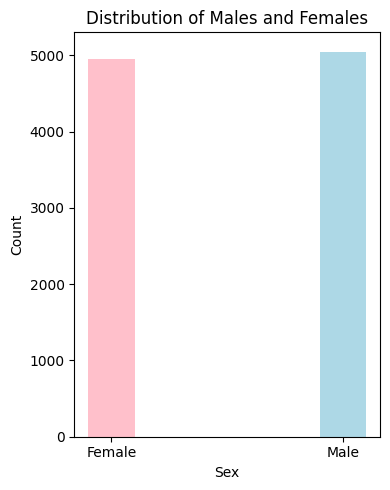

In [13]:
# Get the counts of each sex
counts = data['Sex'].value_counts()

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(4, 5))

# Plot the bar chart
plt.bar(counts.index, counts.values, color=['lightblue', 'pink'], width=0.2)

# Customize the plot
plt.title('Distribution of Males and Females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


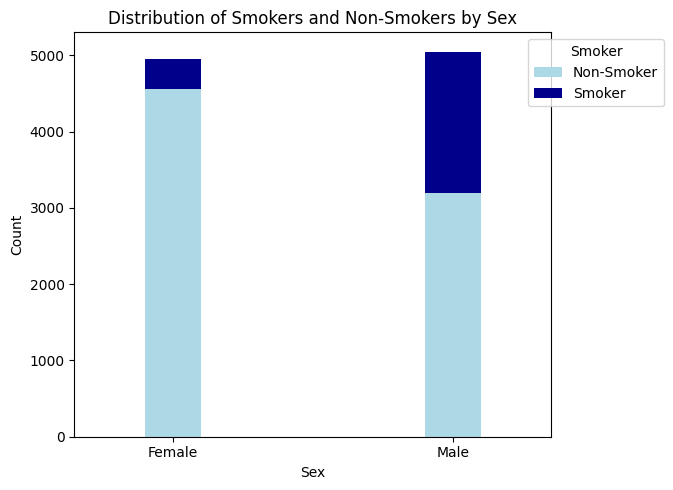

In [14]:
# Group data by 'Sex' and 'Smoker' columns and count occurrences
counts = data.groupby(['Sex', 'Smoker']).size().unstack()

# Create a figure and axis with a wider width
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the grouped bar chart
counts.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'], width=0.2, ax=ax)

# Customize the plot
plt.title('Distribution of Smokers and Non-Smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)

# Move the legend to the upper right with adjusted position
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'], loc='upper right', bbox_to_anchor=(1.25, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Age histogram')

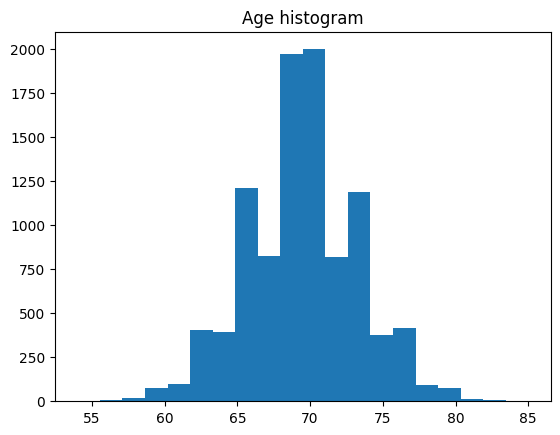

In [15]:
plt.hist(data['Age'], bins=20)
plt.title("Age histogram")

TypeError: bar() got multiple values for argument 'width'

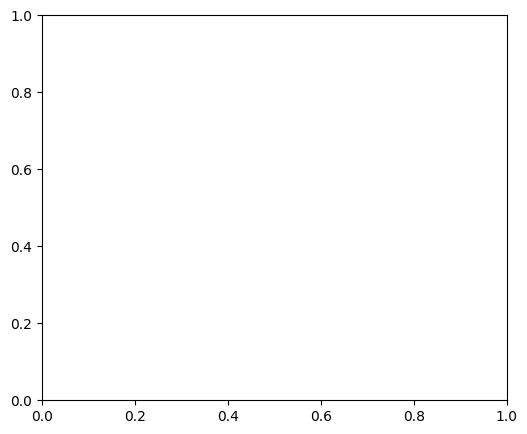

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Result PCR mycoplasma', data=data, palette='Set2', width=0.3)

plt.title('Distribution of PCR Results for Mycoplasma')
plt.xlabel('PCR Result')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])

plt.show()


TypeError: bar() got multiple values for argument 'width'

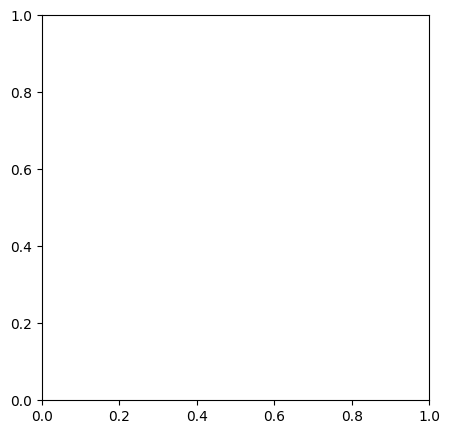

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Militar service', data=data, palette='Set2', width=0.3)

plt.title('Distribution of Military Service')
plt.xlabel('Military Service')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()



In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(y='Ethnicity', data=data, palette='Dark2', width=0.4)
plt.title('Distribution of Ethnicities')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Professions', data=data, palette='Dark2')
plt.title('Distribution of Professions')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

# Probability column

In [18]:
import math
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age standarized'] = scaler.fit_transform(data[['Age']])
data['Probability'] = 0.138895 * data['Sex'] + 0.0198026 * data['Age standarized'] + 0.22314 * data['Smoker'] + 0.83724 * data['Militar service'] + 2.10010 * data['Result PCR mycoplasma'] + 0.7178398 * data['Mechanic'] + 0.86288995 * data['Painter'] + 0.77473 * data['Constructor'] + 1.071584 * data['Caucasian'] - 3.21887 * data['Black'] - 2.9957 * data['Mestizo'] - 3.91202 * data['Indian'] + 1.28 * data['C9orf72'] + 2.036012 * data['SOD1'] + 1.652497 * data['TARDBP'] + 1.86097 * data['FUS']

In [19]:
data['Probability'] = data['Probability'].apply(lambda x: math.exp(x))
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Age standarized,Probability
0,1,1,0,71,1,0,0,0,0,janitor,0,0,0,mestizo,0,0,1,0,0.548387,0.167702
1,1,0,0,69,1,0,0,0,0,constructor,0,0,1,mestizo,0,0,1,0,0.483871,0.290761
2,0,0,0,72,0,0,0,0,0,electrician,0,0,0,caucasian,1,0,0,0,0.580645,2.953770
3,1,0,0,75,1,0,0,0,0,policeman,0,0,0,caucasian,1,0,0,0,0.677419,7.854870
4,0,0,0,69,1,0,0,0,0,engineer,0,0,0,mestizo,0,0,1,0,0.483871,0.116615


In [20]:
data['Probability'] = data['Probability'].apply(lambda x: (x/(1+x)))
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Age standarized,Probability
0,1,1,0,71,1,0,0,0,0,janitor,0,0,0,mestizo,0,0,1,0,0.548387,0.143617
1,1,0,0,69,1,0,0,0,0,constructor,0,0,1,mestizo,0,0,1,0,0.483871,0.225263
2,0,0,0,72,0,0,0,0,0,electrician,0,0,0,caucasian,1,0,0,0,0.580645,0.747077
3,1,0,0,75,1,0,0,0,0,policeman,0,0,0,caucasian,1,0,0,0,0.677419,0.887068
4,0,0,0,69,1,0,0,0,0,engineer,0,0,0,mestizo,0,0,1,0,0.483871,0.104436


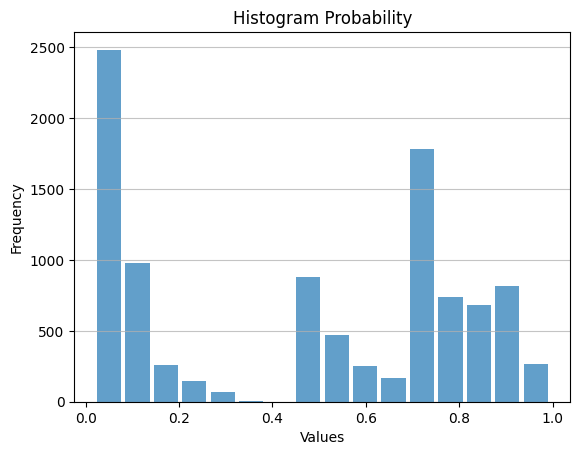

In [21]:
plt.hist(data['Probability'], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram Probability')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [22]:
prevalence = (data['Probability'] > 0.6).sum() / len(data)
print(prevalence)

0.4456


In [23]:
data.drop(['Age standarized', 'Mechanic', 'Painter', 'Constructor', 'Caucasian', 'Black', 'Mestizo', 'Indian'], axis=1)

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Ethnicity,Probability
0,1,1,0,71,1,0,0,0,0,janitor,mestizo,0.143617
1,1,0,0,69,1,0,0,0,0,constructor,mestizo,0.225263
2,0,0,0,72,0,0,0,0,0,electrician,caucasian,0.747077
3,1,0,0,75,1,0,0,0,0,policeman,caucasian,0.887068
4,0,0,0,69,1,0,0,0,0,engineer,mestizo,0.104436
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,75,1,0,0,0,0,manager,mestizo,0.104795
9996,0,1,0,62,0,0,0,0,0,teacher,caucasian,0.785807
9997,1,0,0,67,1,0,0,0,0,waiter,indian,0.050807
9998,1,1,0,71,0,0,0,0,0,constructor,asian,0.759077


# Additional variables

### Obesity

In [24]:
# Define the overall obesity rate and rates for men and women
overall_obesity_rate = 0.13
obesity_rate_men = 0.11
obesity_rate_women = 0.15

# Create a new column 'Obese' based on the obesity rates
data['Obese'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - obesity_rate_men, obesity_rate_men]),
                          np.random.choice([0, 1], size=dataset_size, p=[1 - obesity_rate_women, obesity_rate_women]))

data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Age standarized,Probability,Obese
0,1,1,0,71,1,0,0,0,0,janitor,...,0,0,mestizo,0,0,1,0,0.548387,0.143617,0
1,1,0,0,69,1,0,0,0,0,constructor,...,0,1,mestizo,0,0,1,0,0.483871,0.225263,0
2,0,0,0,72,0,0,0,0,0,electrician,...,0,0,caucasian,1,0,0,0,0.580645,0.747077,0
3,1,0,0,75,1,0,0,0,0,policeman,...,0,0,caucasian,1,0,0,0,0.677419,0.887068,0
4,0,0,0,69,1,0,0,0,0,engineer,...,0,0,mestizo,0,0,1,0,0.483871,0.104436,0


### Physical Activity

In [25]:
# Define the physical activity rates for men and women
physical_activity_rate_men = 1 / 4
physical_activity_rate_women = 1 / 3

# Create a new column 'Adequate Physical Activity' based on the physical activity rates
data['Adequate Physical Activity'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - physical_activity_rate_men, physical_activity_rate_men]),
                                              np.random.choice([0, 1], size=dataset_size, p=[1 - physical_activity_rate_women, physical_activity_rate_women]))

data.head()


,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Age standarized,Probability,Obese,Adequate Physical Activity
0,1,1,0,71,1,0,0,0,0,janitor,...,0,mestizo,0,0,1,0,0.548387,0.143617,0,1
1,1,0,0,69,1,0,0,0,0,constructor,...,1,mestizo,0,0,1,0,0.483871,0.225263,0,0
2,0,0,0,72,0,0,0,0,0,electrician,...,0,caucasian,1,0,0,0,0.580645,0.747077,0,1
3,1,0,0,75,1,0,0,0,0,policeman,...,0,caucasian,1,0,0,0,0.677419,0.887068,0,0
4,0,0,0,69,1,0,0,0,0,engineer,...,0,mestizo,0,0,1,0,0.483871,0.104436,0,0


### Excessive alcohol consumption

In [26]:
# Define excessive alcohol consumption rates by age and sex
alcohol_rates = {
    '45-54': 0.082,
    '55-64': 0.118,
    '65-74': 0.156,
    '75+': 0.16
}

alcohol_rate_female = 0.041
alcohol_rate_male = 0.13

# Create a new column 'Excessive Alcohol Consumption' based on age and sex-specific rates
data['Excessive Alcohol Consumption'] = np.where(
    ((data['Age'] >= 45) & (data['Age'] <= 54) & (data['Sex'] == 1) & (np.random.rand(dataset_size) < alcohol_rates['45-54'])) |
    ((data['Age'] >= 55) & (data['Age'] <= 64) & (data['Sex'] == 1) & (np.random.rand(dataset_size) < alcohol_rates['55-64'])) |
    ((data['Age'] >= 65) & (data['Age'] <= 74) & (data['Sex'] == 1) & (np.random.rand(dataset_size) < alcohol_rates['65-74'])) |
    ((data['Age'] >= 75) & (data['Sex'] == 1) & (np.random.rand(dataset_size) < alcohol_rates['75+'])) |
    ((data['Sex'] == 0) & (np.random.rand(dataset_size) < alcohol_rate_female)) |
    ((data['Sex'] == 1) & (np.random.rand(dataset_size) < alcohol_rate_male)),
    1, 0 # If the conditions are met, assign '1' to the 'Excessive Alcohol Consumption' column; otherwise, assigns '0'.
)

data.head()



,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Ethnicity,Caucasian,Black,Mestizo,Indian,Age standarized,Probability,Obese,Adequate Physical Activity,Excessive Alcohol Consumption
0,1,1,0,71,1,0,0,0,0,janitor,...,mestizo,0,0,1,0,0.548387,0.143617,0,1,0
1,1,0,0,69,1,0,0,0,0,constructor,...,mestizo,0,0,1,0,0.483871,0.225263,0,0,0
2,0,0,0,72,0,0,0,0,0,electrician,...,caucasian,1,0,0,0,0.580645,0.747077,0,1,0
3,1,0,0,75,1,0,0,0,0,policeman,...,caucasian,1,0,0,0,0.677419,0.887068,0,0,0
4,0,0,0,69,1,0,0,0,0,engineer,...,mestizo,0,0,1,0,0.483871,0.104436,0,0,0


### Visited tropical countries prior

In [27]:
tropical_visit_rates = {
    'caucasian' : 0.237,
    'black' : 0.162,
    'mestizo' : 0.561,
    'indian' : 0.793,
    'asian' : 0.417
}

data['Visited tropical countries'] = np.where(
    ((data['Ethnicity'] == 'caucasian') & (np.random.rand(dataset_size) < tropical_visit_rates['caucasian'])) |
    ((data['Ethnicity'] == 'black') & (np.random.rand(dataset_size) < tropical_visit_rates['black'])) |
    ((data['Ethnicity'] == 'mestizo') & (np.random.rand(dataset_size) < tropical_visit_rates['mestizo'])) |
    ((data['Ethnicity'] == 'indian') & (np.random.rand(dataset_size) < tropical_visit_rates['indian'])) |
    ((data['Ethnicity'] == 'asian') & (np.random.rand(dataset_size) < tropical_visit_rates['asian'])),
    1, 0 # If the conditions are met, assign '1' to the 'Excessive Alcohol Consumption' column; otherwise, assigns '0'.
)

data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Caucasian,Black,Mestizo,Indian,Age standarized,Probability,Obese,Adequate Physical Activity,Excessive Alcohol Consumption,Visited tropical countries
0,1,1,0,71,1,0,0,0,0,janitor,...,0,0,1,0,0.548387,0.143617,0,1,0,0
1,1,0,0,69,1,0,0,0,0,constructor,...,0,0,1,0,0.483871,0.225263,0,0,0,0
2,0,0,0,72,0,0,0,0,0,electrician,...,1,0,0,0,0.580645,0.747077,0,1,0,0
3,1,0,0,75,1,0,0,0,0,policeman,...,1,0,0,0,0.677419,0.887068,0,0,0,1
4,0,0,0,69,1,0,0,0,0,engineer,...,0,0,1,0,0.483871,0.104436,0,0,0,1


### Contact sports

In [29]:
sports_rate_female = 0.046
sports_rate_male = 0.11

# Create a new column 'Excessive Alcohol Consumption' based on age and sex-specific rates
data['Contact sports'] = np.where(
    ((data['Sex'] == 0) & (np.random.rand(dataset_size) < sports_rate_female)) |
    ((data['Sex'] == 1) & (np.random.rand(dataset_size) < sports_rate_male)),
    1, 0 # If the conditions are met, assign '1' to the 'Excessive Alcohol Consumption' column; otherwise, assigns '0'.
)

data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Black,Mestizo,Indian,Age standarized,Probability,Obese,Adequate Physical Activity,Excessive Alcohol Consumption,Visited tropical countries,Contact sports
0,1,1,0,71,1,0,0,0,0,janitor,...,0,1,0,0.548387,0.143617,0,1,0,0,0
1,1,0,0,69,1,0,0,0,0,constructor,...,0,1,0,0.483871,0.225263,0,0,0,0,0
2,0,0,0,72,0,0,0,0,0,electrician,...,0,0,0,0.580645,0.747077,0,1,0,0,0
3,1,0,0,75,1,0,0,0,0,policeman,...,0,0,0,0.677419,0.887068,0,0,0,1,0
4,0,0,0,69,1,0,0,0,0,engineer,...,0,1,0,0.483871,0.104436,0,0,0,1,0


### Sleep less than 6 hours on average

In [30]:
sleep_rates = {
    'caucasian' : 0.492,
    'black' : 0.417,
    'mestizo' : 0.272,
    'indian' : 0.392,
    'asian' : 0.628
}

data['Sleep less than 6h'] = np.where(
    ((data['Ethnicity'] == 'caucasian') & (np.random.rand(dataset_size) < sleep_rates['caucasian'])) |
    ((data['Ethnicity'] == 'black') & (np.random.rand(dataset_size) < sleep_rates['black'])) |
    ((data['Ethnicity'] == 'mestizo') & (np.random.rand(dataset_size) < sleep_rates['mestizo'])) |
    ((data['Ethnicity'] == 'indian') & (np.random.rand(dataset_size) < sleep_rates['indian'])) |
    ((data['Ethnicity'] == 'asian') & (np.random.rand(dataset_size) < sleep_rates['asian'])),
    1, 0 # If the conditions are met, assign '1' to the 'Excessive Alcohol Consumption' column; otherwise, assigns '0'.
)

data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,...,Mestizo,Indian,Age standarized,Probability,Obese,Adequate Physical Activity,Excessive Alcohol Consumption,Visited tropical countries,Contact sports,Sleep less than 6h
0,1,1,0,71,1,0,0,0,0,janitor,...,1,0,0.548387,0.143617,0,1,0,0,0,0
1,1,0,0,69,1,0,0,0,0,constructor,...,1,0,0.483871,0.225263,0,0,0,0,0,1
2,0,0,0,72,0,0,0,0,0,electrician,...,0,0,0.580645,0.747077,0,1,0,0,0,0
3,1,0,0,75,1,0,0,0,0,policeman,...,0,0,0.677419,0.887068,0,0,0,1,0,1
4,0,0,0,69,1,0,0,0,0,engineer,...,1,0,0.483871,0.104436,0,0,0,1,0,1


## Results

TypeError: bar() got multiple values for argument 'width'

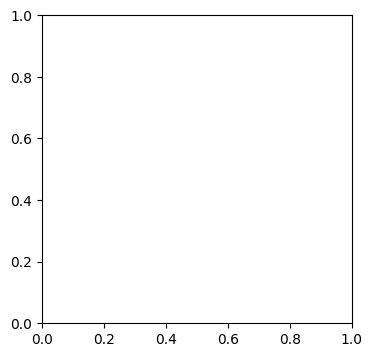

In [28]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Obese', data=data, palette='Set2', width=0.3)
plt.title('Distribution of Obese')
plt.xlabel('Obese')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Adequate Physical Activity', data=data, palette='Set2', width=0.3)
plt.title('Distribution of Adequate Physical Activity')
plt.xlabel('Adequate Physical Activity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Excessive Alcohol Consumption', data=data, palette='Set2', width=0.3)
plt.title('Distribution of Excessive Alcohol Consumption')
plt.xlabel('Excessive Alcohol Consumption')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()